# Baseball Salary Prediction

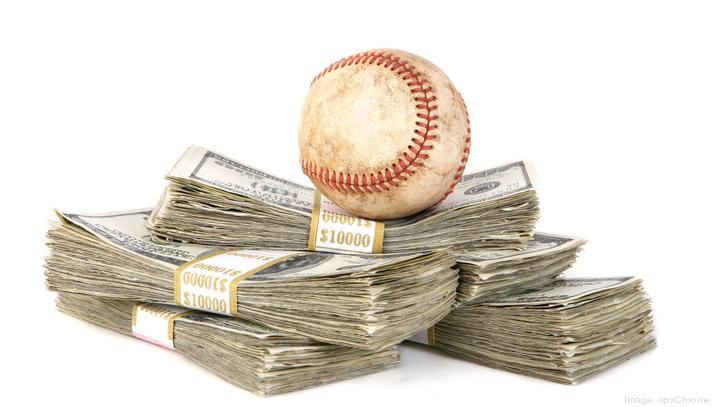

# About Dataset

**Business Problem**

Can a machine learning project be realized for salary predictions of baseball players whose salary information and career statistics from 1986 are shared?

**Dataset Story**

This data set was originally taken from the StatLib library at Carnegie Mellon University.The data set is part of the data used in the 1988 ASA Graphics Division Poster Session.Salary data was originally taken from Sports Illustrated, April 20, 1987.1986 and career statistics are from Collier Books, published by Macmillan Publishing Company, New York Derived from the 1987 Baseball Encyclopedia Update.

**Variables**

AtBat: The number of times a baseball was hit by a bat during the 1986-1987 season.

Hits: Number of hits in the 1986-1987 season.

HmRun: Most valuable at-bats in the 1986-1987 season.

Runs: Runs scored for his team during the 1986-1987 season.

RBI: The number of times a batter scored a run while batting.

Walks: The number of errors committed by an opposing batter.

Years: Number of years (years) a player has played in the major leagues.

CAtBats: Number of at-bats during the player's career.

CHits: Number of hits during the player's career.

CHmRun: Player's most valuable run during his career.

CRuns: The number of runs scored for the team during the player's career.

CRBI: Number of runs scored by the player during his career.

CWalks: The number of errors the player has allowed to opposing players during his career.

League: A factor with A and N levels indicating the league the player played in until the end of the season.

Division: A factor with levels E and W that indicates the position the player played at the end of 1986.

PutOuts: Helping your teammate in the game.

Assits: The number of assists made by the player in the 1986-1987 season.

Errors: Number of errors by the player in the 1986-1987 season.

Salary: Player's salary for the 1986-1987 season (in thousands).

NewLeague: A factor with A and N levels indicating the player's league at the beginning of the 1987 season.

# Packages and reading the dataset

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [38]:
def load_application_train():
    data = pd.read_csv("hitters.csv")
    return data

df = load_application_train()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis

In [40]:
def check_dataframe(dataframe, head=5):
    print("##### Shape #####")
    print(dataframe.shape)

    print("\n##### Types #####")
    print(dataframe.dtypes)

    print("\n##### Tail #####")
    print(dataframe.tail(head))

    print("\n##### Head #####")
    print(dataframe.head(head))

    print("\n##### Null Analysis #####")
    print(dataframe.isnull().sum())

    print("\n##### Quantiles #####")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_dataframe(df)

##### Shape #####
(322, 20)

##### Types #####
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

##### Tail #####
     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks League Division  PutOuts 

.

**NUMERIC AND CATEGORİCAL VARIABLES**

In [41]:
def grab_col_names(dataframe, cat_th=10, car_th=20):  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
        
    return cat_cols, num_cols, cat_but_car

def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)


def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [42]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0
Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


(['League', 'Division', 'NewLeague'],
 ['AtBat',
  'Hits',
  'HmRun',
  'Runs',
  'RBI',
  'Walks',
  'Years',
  'CAtBat',
  'CHits',
  'CHmRun',
  'CRuns',
  'CRBI',
  'CWalks',
  'PutOuts',
  'Assists',
  'Errors',
  'Salary'],
 [])

   League  Ratio
A     175 54.348
N     147 45.652
##########################################


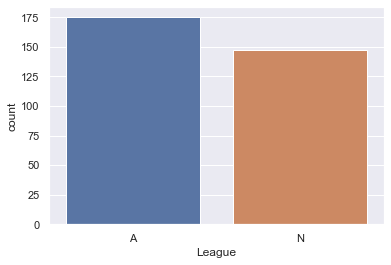

   Division  Ratio
W       165 51.242
E       157 48.758
##########################################


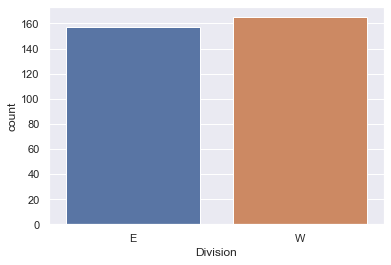

   NewLeague  Ratio
A        176 54.658
N        146 45.342
##########################################


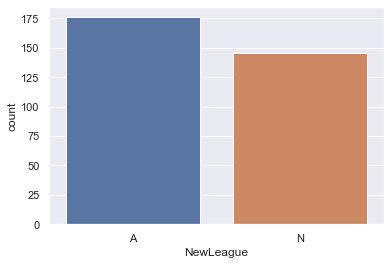

In [43]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

count   322.000
mean    380.929
std     153.405
min      16.000
1%       20.420
5%      161.000
10%     194.100
25%     255.250
50%     379.500
75%     512.000
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


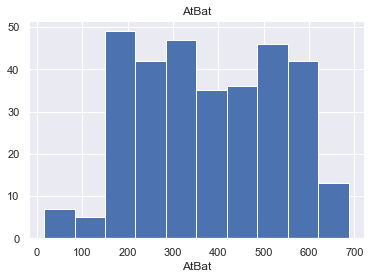

count   322.000
mean    101.025
std      46.455
min       1.000
1%        4.420
5%       39.000
10%      45.100
25%      64.000
50%      96.000
75%     137.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


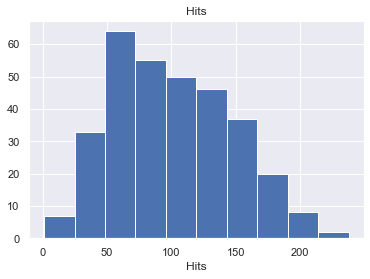

count   322.000
mean     10.770
std       8.709
min       0.000
1%        0.000
5%        0.000
10%       1.000
25%       4.000
50%       8.000
75%      16.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


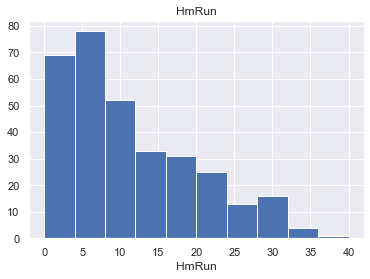

count   322.000
mean     50.910
std      26.024
min       0.000
1%        1.210
5%       17.000
10%      20.100
25%      30.250
50%      48.000
75%      69.000
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


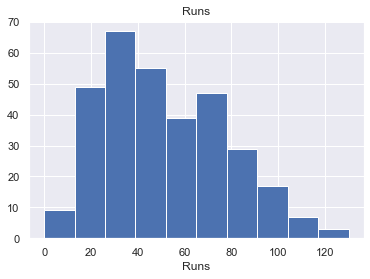

count   322.000
mean     48.028
std      26.167
min       0.000
1%        2.000
5%       14.000
10%      19.000
25%      28.000
50%      44.000
75%      64.750
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


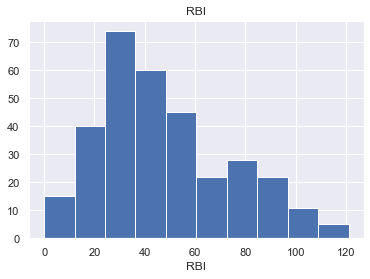

count   322.000
mean     38.742
std      21.639
min       0.000
1%        1.000
5%       11.050
10%      15.000
25%      22.000
50%      35.000
75%      53.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


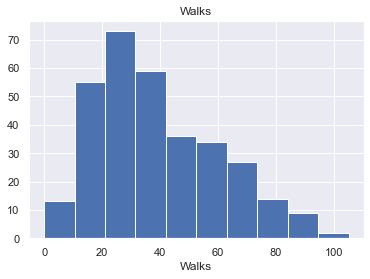

count   322.000
mean      7.444
std       4.926
min       1.000
1%        1.000
5%        1.000
10%       2.000
25%       4.000
50%       6.000
75%      11.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


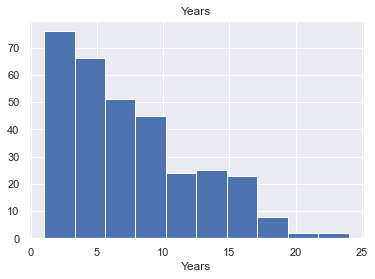

count     322.000
mean     2648.683
std      2324.206
min        19.000
1%         41.000
5%        216.500
10%       342.200
25%       816.750
50%      1928.000
75%      3924.250
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


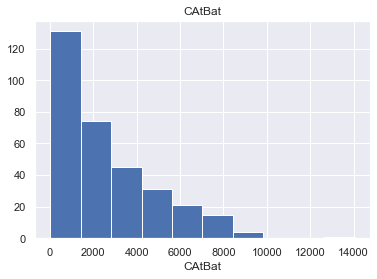

count    322.000
mean     717.571
std      654.473
min        4.000
1%         9.840
5%        54.000
10%       86.000
25%      209.000
50%      508.000
75%     1059.250
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


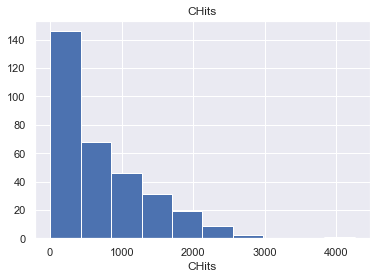

count   322.000
mean     69.491
std      86.266
min       0.000
1%        0.000
5%        2.000
10%       4.000
25%      14.000
50%      37.500
75%      90.000
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


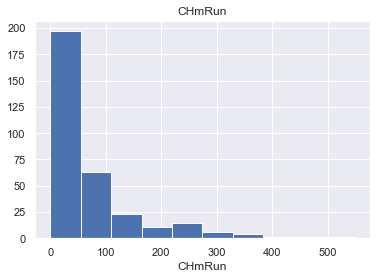

count    322.000
mean     358.795
std      334.106
min        1.000
1%         3.630
5%        27.000
10%       38.100
25%      100.250
50%      247.000
75%      526.250
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


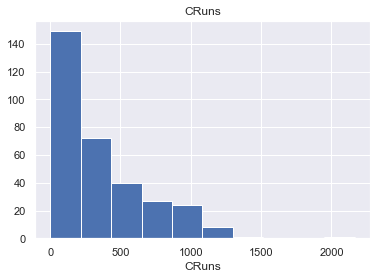

count    322.000
mean     330.118
std      333.220
min        0.000
1%         4.630
5%        22.050
10%       34.100
25%       88.750
50%      220.500
75%      426.250
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


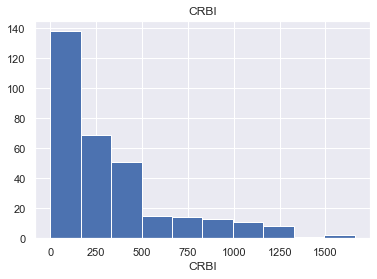

count    322.000
mean     260.239
std      267.058
min        0.000
1%         4.000
5%        15.050
10%       30.100
25%       67.250
50%      170.500
75%      339.250
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


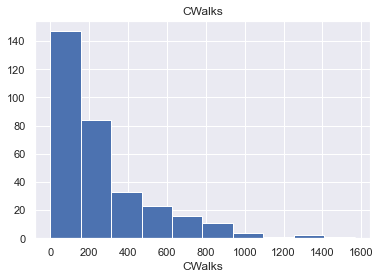

count    322.000
mean     288.938
std      280.705
min        0.000
1%         0.000
5%        33.200
10%       62.200
25%      109.250
50%      212.000
75%      325.000
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


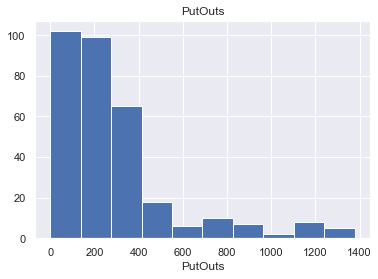

count   322.000
mean    106.913
std     136.855
min       0.000
1%        0.000
5%        0.000
10%       2.000
25%       7.000
50%      39.500
75%     166.000
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


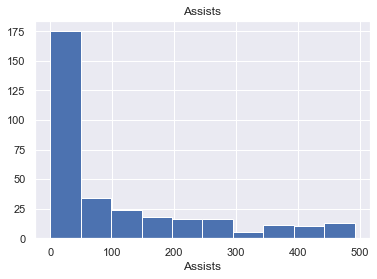

count   322.000
mean      8.040
std       6.368
min       0.000
1%        0.000
5%        0.000
10%       1.000
25%       3.000
50%       6.000
75%      11.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


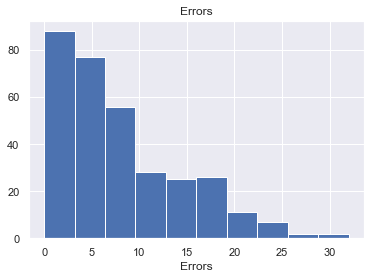

count    263.000
mean     535.926
std      451.119
min       67.500
1%        70.000
5%        86.600
10%      100.000
25%      190.000
50%      425.000
75%      750.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


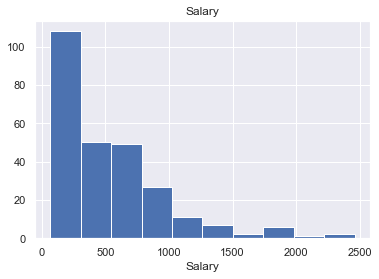

In [44]:
for col in num_cols:
    num_summary(df, col, plot=True)

**Analysis of Categorical Variables by Target**

In [45]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




# Encoding

In [46]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [47]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,NaN,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.000,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.000,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.000,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.500,1


# Correlation analysis

In [48]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.75):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df)

['Hits',
 'Runs',
 'RBI',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'NewLeague']

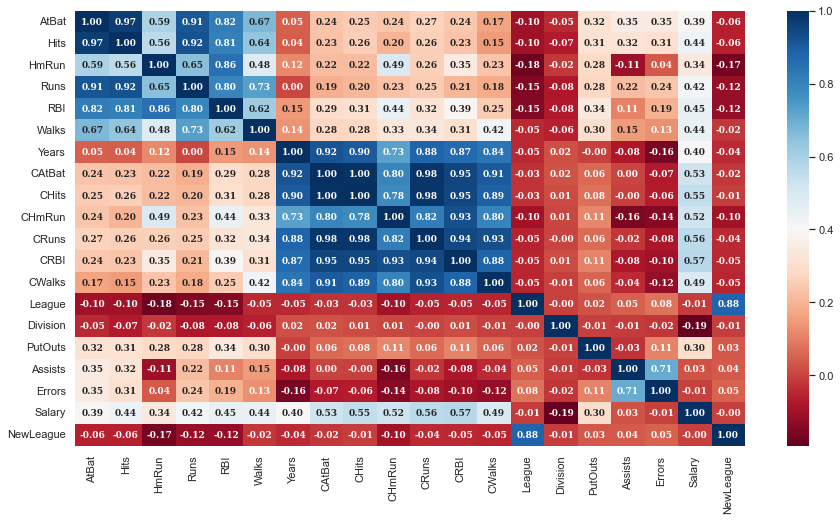

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method= 'pearson'),annot=True,fmt=".2f",
                cmap="RdBu",
                annot_kws={
                       "fontsize":9,
                       "fontweight":"bold",
                       "fontfamily":"serif"});

# Outliers

In [50]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [51]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


# Rare Analysis

In [52]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

rare_analyser(df, "Salary", cat_cols)

League : 2
   COUNT  RATIO  TARGET_MEAN
0    175  0.543      542.000
1    147  0.457      529.118


Division : 2
   COUNT  RATIO  TARGET_MEAN
0    157  0.488      624.271
1    165  0.512      450.877


NewLeague : 2
   COUNT  RATIO  TARGET_MEAN
0    176  0.547      537.113
1    146  0.453      534.554




# Feature Extraction

In [53]:
new_num_cols=[col for col in num_cols if col!="Salary"]
df[new_num_cols]=df[new_num_cols]+0.0000000001
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]               #  Oyucunun kariyeri boyunca yaptığı en değerli sayısı  /  Oyuncunun major liginde oynama süresi (sene)
df["NEW_CRuns"] = df["CRuns"] / df["Years"]                 #  Oyuncunun kariyeri boyunca takımına kazandırdığı sayı  /  Oyuncunun major liginde oynama süresi (sene)
df["NEW_Chits"] = df["CHits"] * df["Years"]                 #  Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı  *  Oyuncunun major liginde oynama süresi (sene)
df["NEW_RW"] = df["RBI"] * df["Walks"]                      #  Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı * Karşı oyuncuya yaptırılan hata sayısı
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]                #  Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı / Oyuncunun kariyeri boyunca topa vurma sayısı
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]             #  Oyucunun kariyeri boyunca yaptığı en değerli sayısı  /  Oyuncunun kariyeri boyunca topa vurma sayısı
df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']      #  1986-1987 sezonundaki isabet sayısı  / Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı + 1986-1987 sezonundaki isabet sayısı
df['NEW_RBI'] = df['RBI'] / df['CRBI']                      #  Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı  /  Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı
df['NEW_Walks'] = df['Walks'] / df['CWalks']                #  Karşı oyuncuya yaptırılan hata sayısı / Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
df['NEW_PutOuts'] = df['PutOuts'] * df['Years']             #  Oyun icinde takım arkadaşınla yardımlaşma  /  Oyuncunun major liginde oynama süresi (sene)
df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100       #  (1986-1987 sezonundaki isabet sayısı / 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı) * 100
df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']           #  Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı  *  Oyuncunun kariyeri boyunca topa vurma sayısı

# Scaling

In [54]:
num_cols = [col for col in num_cols if col not in ["Salary"]]

In [55]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_CHmRun,NEW_CRuns,NEW_Chits,NEW_RW,NEW_CH_CB,NEW_CHm_CAT,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,0,0,1.085,-0.041,1.750,NaN,0,1.000,30.000,66.000,406.000,0.225,0.003,67.000,1.000,1.000,446.000,22.526,8497.000
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1,1,1.947,0.022,0.500,475.000,1,966.000,22.929,11690.000,1482.000,0.242,0.020,81.097,0.092,0.104,8848.000,25.714,1427886.000
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,0,1,3.096,0.267,1.000,480.000,0,189.000,74.667,1371.000,5472.000,0.281,0.039,130.284,0.271,0.289,2640.000,27.140,431984.000
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.467,1.364,1.830,0.675,1,0,-0.056,-0.179,-0.375,500.000,1,2475.000,75.273,17325.000,2886.000,0.280,0.040,141.090,0.093,0.105,2200.000,28.427,4716264.000
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,1,0,2.749,0.003,-0.250,91.500,1,24.000,24.000,202.000,1260.000,0.255,0.030,87.861,0.913,0.909,1610.000,27.103,18216.000


# Missing values analysis

In [56]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
missing_values_table(df, True)

        n_miss  ratio
Salary      59 18.320


['Salary']

In [57]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NEW_CHmRun,NEW_CRuns,NEW_Chits,NEW_RW,NEW_CH_CB,NEW_CHm_CAT,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,0.000,0.000,1.085,-0.041,1.750,79.000,0.000,1.000,30.000,66.000,406.000,0.225,0.003,67.000,1.000,1.000,446.000,22.526,8497.000
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.000,1.000,1.947,0.022,0.500,475.000,1.000,966.000,22.929,11690.000,1482.000,0.242,0.020,81.097,0.092,0.104,8848.000,25.714,1427886.000
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,0.000,1.000,3.096,0.267,1.000,480.000,0.000,189.000,74.667,1371.000,5472.000,0.281,0.039,130.284,0.271,0.289,2640.000,27.140,431984.000
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.467,1.364,1.830,0.675,1.000,0.000,-0.056,-0.179,-0.375,500.000,1.000,2475.000,75.273,17325.000,2886.000,0.280,0.040,141.090,0.093,0.105,2200.000,28.427,4716264.000
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,1.000,0.000,2.749,0.003,-0.250,91.500,1.000,24.000,24.000,202.000,1260.000,0.255,0.030,87.861,0.913,0.909,1610.000,27.103,18216.000


In [58]:
missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

# Local Outlier Factor

-1745.7219049999999 3143.2031749999996
-1.601057591743129


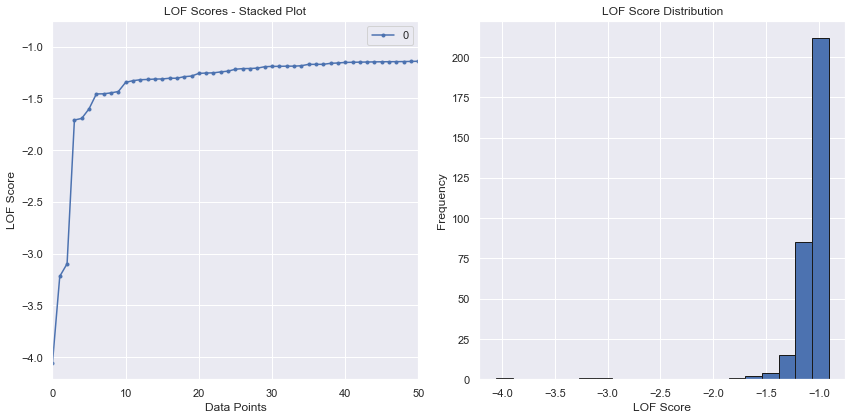

*********************************************************************************************************
     AtBat   Hits  HmRun   Runs    RBI  Walks  Years  CAtBat  CHits  CHmRun  \
236 -0.555 -0.603 -0.667 -0.852 -0.517 -0.161  2.571   3.902  4.408   1.612   
249  0.154  0.068  0.833  0.439  0.381  1.839  2.000   2.446  2.355   6.717   
278  0.691  0.630  1.083  0.258  1.007 -0.387  1.714   2.198  2.440   3.072   
302 -0.699 -0.616 -0.500 -0.877 -0.408 -0.323  2.429   2.526  2.616   4.493   
306 -0.983 -0.877 -0.333 -0.877 -0.517 -0.742  1.857   2.081  2.228   2.691   

     CRuns  CRBI  CWalks  League  Division  PutOuts  Assists  Errors   Salary  \
236  4.502 3.240   5.131   1.000     1.000    1.441    0.022   0.000  750.000   
249  2.962 4.262   4.307   0.000     1.000   -0.983   -0.248  -0.750  487.500   
278  2.092 3.196   1.131   1.000     1.000    4.394    0.085   0.125 1450.000   
302  2.406 4.241   2.774   1.000     1.000    0.862   -0.066   0.125  677.500   
306  1.880 3.3

In [59]:
from sklearn.neighbors import LocalOutlierFactor
def LOF(data, variable):
    low, up = outlier_thresholds(data, variable)
    print(low, up)
    clf = LocalOutlierFactor(n_neighbors=20)
    clf.fit_predict(data)
    df_scores = clf.negative_outlier_factor_
    th = np.sort(df_scores)[5]
    print(th)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    scores = pd.DataFrame(np.sort(df_scores))
    scores.plot(stacked=True, xlim=[0, 50], style='.-', ax=ax1)
    ax1.set_xlabel('Data Points')
    ax1.set_ylabel('LOF Score')
    ax1.set_title('LOF Scores - Stacked Plot')

    ax2.hist(df_scores, bins=20, edgecolor='k')
    ax2.set_xlabel('LOF Score')
    ax2.set_ylabel('Frequency')
    ax2.set_title('LOF Score Distribution')

    plt.tight_layout()
    plt.show()

    print("*********************************************************************************************************")
    outliers = data[df_scores < th]
    print(outliers)
    print("*********************************************************************************************************")
    #print(data.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T)
    
    data.drop(axis=0, labels=outliers.index, inplace=True)

LOF(df, "Salary")

In [60]:
df.shape

(317, 32)

# Model

###################### Mean and Std(Target Variable) ######################
Mean:  528.0774176656149
Std:  433.0545007019931
###################### Model Results ######################
             RMSE_Train  RMSE_Test  MSE_Train   MSE_Test  R2_score_Train  \
Model_Names                                                                
RF               98.998    209.486   9800.664  43884.277           0.945   
LR              236.130    231.455  55757.498  53571.510           0.689   
GBM              58.596    232.359   3433.526  53990.669           0.981   
Lasso           243.564    236.208  59323.255  55794.322           0.669   
Ridge           243.362    238.820  59225.250  57034.866           0.670   
CatBoost         13.121    261.787    172.158  68532.173           0.999   
XGBoost           0.024    283.772      0.001  80526.428           1.000   
KNN             246.132    299.522  60580.870  89713.341           0.662   
ElasticNet      292.797    307.292  85730.370  94428.41

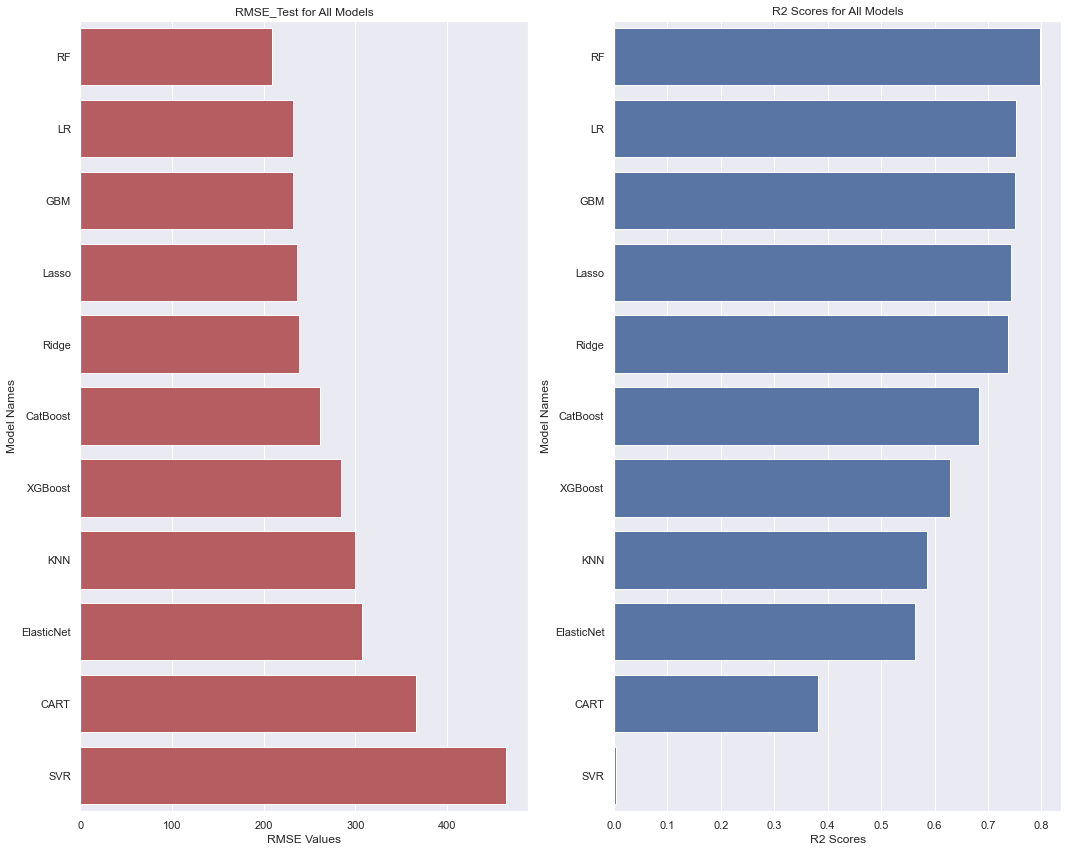

#################### Ridge ####################
RMSE_Train: 288.0803 , RMSE_Test: 301.7586 , R2_Train: 0.663 , R2_Test: 0.719 (Tuned Model) (Ridge) 
Ridge best params: {'alpha': 2.320794416806386}

#################### Lasso ####################
RMSE_Train: 290.9264 , RMSE_Test: 293.9022 , R2_Train: 0.657 , R2_Test: 0.714 (Tuned Model) (Lasso) 
Lasso best params: {'alpha': 3.0679536367065814}

#################### ENet ####################
RMSE_Train: 288.1472 , RMSE_Test: 281.7281 , R2_Train: 0.658 , R2_Test: 0.709 (Tuned Model) (ENet) 
ENet best params: {'alpha': 0.026683496156031508}

#################### SVR ####################
RMSE_Train: 421.7994 , RMSE_Test: 460.8404 , R2_Train: 0.004 , R2_Test: -0.001 (Tuned Model) (SVR) 
SVR best params: {'C': 0.9}

#################### KNN ####################
RMSE_Train: 305.3466 , RMSE_Test: 402.7357 , R2_Train: 0.708 , R2_Test: 0.603 (Tuned Model) (KNN) 
KNN best params: {'n_neighbors': 3}

#################### CART ####################
R

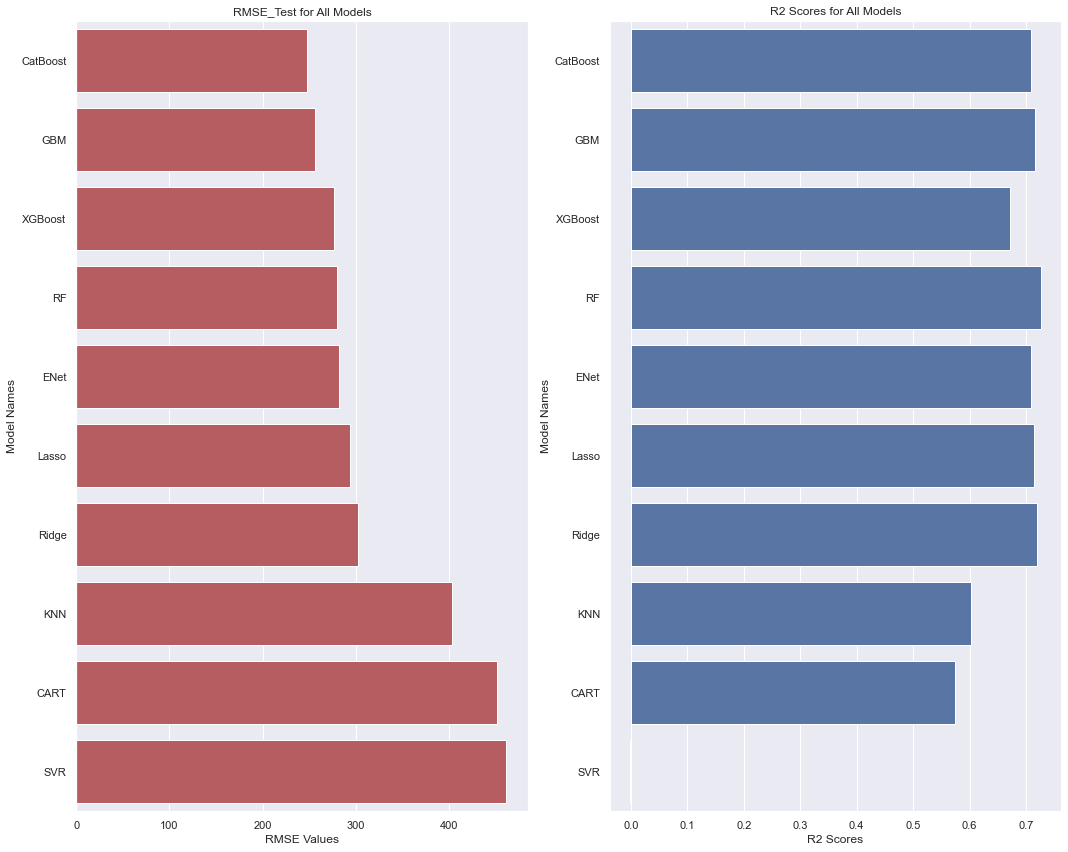

In [61]:
def create_base_model(dataframe, target, plot=False, save_results=False):
    names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_scores = []
    test_r2_scores = []
    train_mse_results = []
    test_mse_results = []
    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
    models = [('LR', LinearRegression()),
              ("Ridge", Ridge()),
              ("Lasso", Lasso()),
              ("ElasticNet", ElasticNet()),
              ('SVR', SVR()),
              ('KNN', KNeighborsRegressor()),
              ('CART', DecisionTreeRegressor()),
              ('RF', RandomForestRegressor()),
              ('GBM', GradientBoostingRegressor()),
              ("XGBoost", XGBRegressor(objective='reg:squarederror')),
              ("CatBoost", CatBoostRegressor(verbose=False))]
    print("###################### Mean and Std(Target Variable) ######################")
    print("Mean: ", dataframe[target].mean())
    print("Std: ", dataframe[target].std())
    print("###################### Model Results ######################")

    for name, regressor in models:
        regressor.fit(X_train, y_train)
        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        # RMSE
        train_rmse_result = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse_result = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_rmse_results.append(train_rmse_result)
        test_rmse_results.append(test_rmse_result)
        # MSE
        train_mse_result = mean_squared_error(y_train, y_train_pred)
        test_mse_result = mean_squared_error(y_test, y_test_pred)
        train_mse_results.append(train_mse_result)
        test_mse_results.append(test_mse_result)
        # score
        train_r2_score = regressor.score(X_train, y_train)
        test_r2_score = regressor.score(X_test, y_test)
        train_r2_scores.append(train_r2_score)
        test_r2_scores.append(test_r2_score)
        # Model names
        names.append(name)

    model_results = pd.DataFrame({'Model_Names': names,
                                  'RMSE_Train': train_rmse_results,
                                  'RMSE_Test': test_rmse_results,
                                  'MSE_Train': train_mse_results,
                                  'MSE_Test': test_mse_results,
                                  'R2_score_Train': train_r2_scores,
                                  'R2_score_Test': test_r2_scores,
                                  }).set_index("Model_Names")

    model_results = model_results.sort_values(by="RMSE_Test", ascending=True)
    print(model_results)

    if plot:
        plt.figure(figsize=(15, 12))
        # Plot RMSE Test Scores
        plt.subplot(1, 2, 1)
        sns.barplot(x='RMSE_Test', y=model_results.index, data=model_results, color="r")
        plt.xlabel('RMSE Values')
        plt.ylabel('Model Names')
        plt.title('RMSE_Test for All Models')

        # Plot R2 Test Scores
        plt.subplot(1, 2, 2)
        sns.barplot(x='R2_score_Test', y=model_results.index, data=model_results, color="b")
        plt.xlabel('R2 Scores')
        plt.ylabel('Model Names')
        plt.title('R2 Scores for All Models')
        plt.tight_layout()
        plt.show()

    if save_results:
        model_results.to_csv("model_results.csv")

    return model_results


def create_model_tuned(dataframe, target, plot=True, save_results=True):
    names = []
    train_rmse_results = []
    test_rmse_results = []
    train_r2_scores = []
    test_r2_scores = []
    train_mse_results = []
    test_mse_results = []
    best_params = []

    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

    ridge_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}
    lasso_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}
    enet_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}
    svr_params = {"C": np.arange(0.1,1,0.1)}
    knn_params = {"n_neighbors": np.arange(1,50,1)}
    cart_params = {"min_samples_split": range(2,100), "max_leaf_nodes": range(2,10)}
    adaboost_params = {"learning_rate": [0.01, 0.1], "loss": ["linear", "square", "exponential"], "n_estimators": [100, 500, 1000]}
    xgboost_params = {"colsample_bytree": [0.4, 0.5 ,0.6], "n_estimators": [200, 500, 1000], "max_depth": [3,5,8], "learning_rate": [0.1, 0.01]}
    rf_params = {"max_depth": [5, 8, 15, None], "max_features": [5, 7, "auto"], "min_samples_split": [8, 15, 20], "n_estimators": [200, 500]}
    gbm_params = {"learning_rate": [0.01, 0.1], "max_depth": [3, 8], "n_estimators": [500, 1000], "subsample": [1, 0.5, 0.7]}
    catboost_params = {"iterations": [200, 500], "learning_rate": [0.01, 0.1], "depth": [3, 6]}



    regressors = [
        ("Ridge", Ridge(), ridge_params),
        ("Lasso", Lasso(), lasso_params),
        ("ENet", ElasticNet(), enet_params),
        ("SVR", SVR(), svr_params),
        ("KNN", KNeighborsRegressor(), knn_params),
        ("CART", DecisionTreeRegressor(), cart_params),
        ("XGBoost", XGBRegressor(objective="reg:squarederror"), xgboost_params),
        ("RF", RandomForestRegressor(), rf_params),
        ('GBM', GradientBoostingRegressor(), gbm_params),
        ("CatBoost", CatBoostRegressor(verbose=False), catboost_params)
    ]

    for name, regressor, params in regressors:
        print(f"#################### {name} ####################")

        gs_best = GridSearchCV(regressor, params, cv=5, n_jobs=-1, verbose=False).fit(X_train, y_train)

        final_model = regressor.set_params(**gs_best.best_params_).fit(X_train, y_train)
        train_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
        test_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=5, scoring="neg_mean_squared_error")))
        train_rmse_results.append(train_rmse_result)
        test_rmse_results.append(test_rmse_result)
        train_r2_score = final_model.score(X_train, y_train)
        test_r2_score = final_model.score(X_test, y_test)
        train_r2_scores.append(train_r2_score)
        test_r2_scores.append(test_r2_score)
        train_mse_result = train_rmse_result**2
        test_mse_result = test_rmse_result**2
        train_mse_results.append(train_mse_result)
        test_mse_results.append(test_mse_result)
        print(f"RMSE_Train: {round(train_rmse_result, 4)} , RMSE_Test: {round(test_rmse_result, 4)} , R2_Train: {round(train_r2_score, 3)} , R2_Test: {round(test_r2_score, 3)} (Tuned Model) ({name}) ")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_params.append(gs_best.best_params_)
        names.append(name)

    model_tuned_results = pd.DataFrame({
        'Model_Names': names,
        'RMSE_Train': train_rmse_results,
        'RMSE_Test': test_rmse_results,
        'MSE_Train': train_mse_results,
        'MSE_Test': test_mse_results,
        'R2_score_Train': train_r2_scores,
        'R2_score_Test': test_r2_scores,
        "best_params": best_params
    }).set_index("Model_Names")
    model_tuned_results = model_tuned_results.sort_values(by="RMSE_Test", ascending=True)
    print(model_tuned_results)
    
    if plot:
        plt.figure(figsize=(15, 12))
        # Plot RMSE Test Scores
        plt.subplot(1, 2, 1)
        sns.barplot(x='RMSE_Test', y=model_tuned_results.index, data=model_tuned_results, color="r")
        plt.xlabel('RMSE Values')
        plt.ylabel('Model Names')
        plt.title('RMSE_Test for All Models')

        # Plot R2 Test Scores
        plt.subplot(1, 2, 2)
        sns.barplot(x='R2_score_Test', y=model_tuned_results.index, data=model_tuned_results, color="b")
        plt.xlabel('R2 Scores')
        plt.ylabel('Model Names')
        plt.title('R2 Scores for All Models')
        plt.tight_layout()
        plt.show()

    if save_results:
        model_tuned_results.to_csv("model_tuned_results.csv")

    return model_tuned_results

base_model_results = create_base_model(df, "Salary", plot=True, save_results=True)
tuned_model_results = create_model_tuned(df, "Salary", plot=True, save_results=True)

# LİNEAR REGRESSİON

In [62]:
y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

lr_model = LinearRegression()
model = lr_model.fit(X_train,y_train)

y_pred = model.predict(X_train)
lr_train_rmse =np.sqrt(mean_squared_error(y_train,y_pred))
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train,y_pred))))

lr_train_r2 = lr_model.score(X_train,y_train)
print("Train R-SQUARED:", "{:,.3f}".format(lr_model.score(X_train,y_train)))

y_pred = model.predict(X_test)
lr_test_rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print("Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

lr_test_r2 = lr_model.score(X_test,y_test)
print("Test R-SQUARED:", "{:,.3f}".format(lr_model.score(X_test,y_test)))

Train RMSE: 236.13
Train R-SQUARED: 0.689
Test RMSE: 231.46
Test R-SQUARED: 0.753


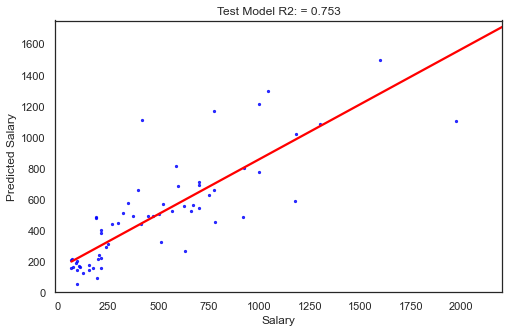

In [63]:
plt.figure(figsize=(8,5))
sns.set_style("white") 
g = sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 's': 5},
                ci=0.95, color="red")
g.set_title(f"Test Model R2: = {lr_model.score(X_test, y_test):.3f}")
g.set_ylabel("Predicted Salary")
g.set_xlabel("Salary")
plt.xlim(-10, 2200)
plt.ylim(0, 1750)
plt.show()

# RANDOM FOREST

In [66]:
y=df["Salary"]
X=df.drop("Salary", axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=17)


rf_model = RandomForestRegressor().fit(X_train, y_train)

y_pred = rf_model.predict(X_train)
y_pred1= rf_model.predict(X_test)

rf_train_rmse =np.sqrt(mean_squared_error(y_train, y_pred))
rf_test_rmse=np.sqrt(mean_squared_error(y_test, y_pred1))
rf_train_r2 = r2_score(y_train, y_pred)
rf_test_r2 = r2_score(y_test, y_pred1)

rf_params = {"max_depth": [5, 8, 15, None], "max_features": [5, 7, "auto"], "min_samples_split": [8, 15, 20], "n_estimators": [200, 500]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
rf_cv_model.best_params_

rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)

rf_tuned_test_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_test_r2 = r2_score(y_test, y_pred)

print("RF_TUNED Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
RF_TUNED Test R^2: 0.73


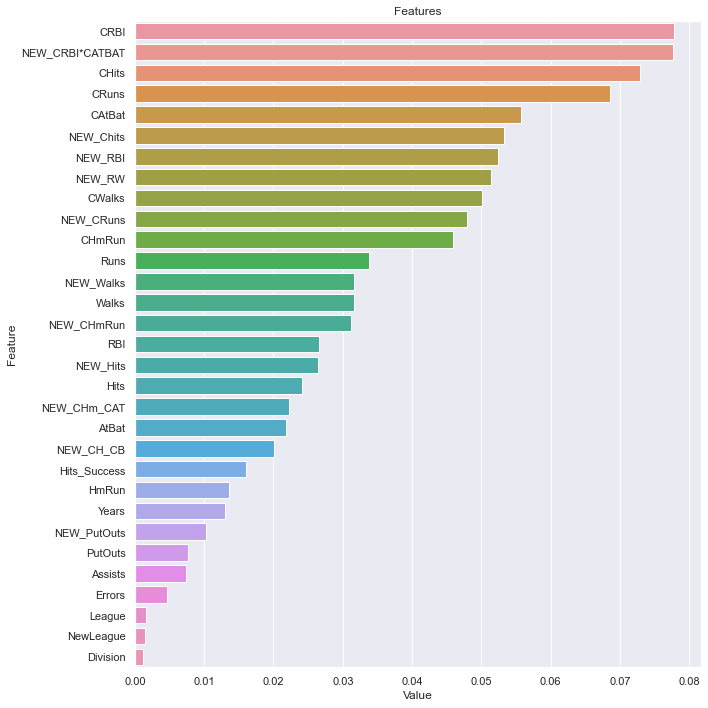

In [67]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_tuned, X_train)